In [20]:
import pandas as pd

df=pd.read_excel("/Users/four/Downloads/退货退款买手审核.xlsx")
df_dealin48=df[['ID_SellerId','ordercnt','dealordercntin48']]
df_dealin48['dealrate']=df_dealin48['dealordercntin48']/df_dealin48['ordercnt']
print(sum(df_dealin48['dealordercntin48']/sum(df_dealin48['ordercnt'])))
print(min(df_dealin48['dealordercntin48'])) 
#print(df_dealin48.describe)
print(df_dealin48.loc[df_dealin48['dealrate']<0.5])


0.947155154872
0
      ID_SellerId  ordercnt  dealordercntin48  dealrate
107      20053630       195                58  0.297436
323      13000219        59                22  0.372881
355      20774244        52                 9  0.173077
505      17154043        34                15  0.441176
571      21001228        29                 7  0.241379
579      16232695        28                 7  0.250000
595      17870499        27                 7  0.259259
787        481998        15                 1  0.066667
821      20293116        14                 3  0.214286
860       2645083        13                 5  0.384615
932       4519408        11                 1  0.090909
935      13004862        11                 4  0.363636
942      17277617        11                 1  0.090909
1009      1505247         9                 2  0.222222
1036      7318985         9                 4  0.444444
1043     17223534         9                 4  0.444444
1058     20308544         9    

/Users/four/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [1]:
# the reasons of returnbill
import pandas as pd

def cutgroup(df,bins,cutby):
    df["gapgroup"]=pd.cut(df[cutby],bins)
    df_group=pd.DataFrame(df["gapgroup"].value_counts().sort_index())
    df_group["percent"]=df_group/df_group["gapgroup"].sum()
    df_group.columns = ['数量','占比']
    return df_group
df=pd.read_excel("data/退单定责20180420-20180620.xlsx")
df_presell=df["是否预定商品"].value_counts()

# the no presell products return bill  the reason of long time no recive
df_norecive=df.loc[(df["是否预定商品"]=="否")&(df["退款原因"]=="长时间未收到货")]

# the no presell products return bill  the reason of long time no send
df_nosend=df.loc[(df["是否预定商品"]=="否")&(df["退款原因"]=="买手长时间不发货")]


#贝海直邮、第三方直邮、拼邮 
logistic1=["贝海直邮","第三方直邮","拼邮"]
df_norecive1=df_norecive.loc[df_norecive["物流方式"].isin(logistic1)]
df_nosend1=df_nosend.loc[df_nosend["物流方式"].isin(logistic1)]


#贝海保税、第三方保税、国内快递
logistic2=["贝海保税","第三方保税","国内快递"]
df_norecive2=df_norecive.loc[df_norecive["物流方式"].isin(logistic2)]
df_nosend2=df_nosend.loc[df_nosend["物流方式"].isin(logistic2)]

# define bins and cutby
bins=[-1,3,6,9,12,30,10000]
cutby="最新申请时间减去付款时间(天)"

# use function to compute the percents
dfNoReciveGw=cutgroup(df_norecive1,bins,cutby)
print("长时间不发货-贝海直邮、第三方直邮、拼邮-退单量")
print(dfNoReciveGW)
print("\n")

dfNoReciveGn=cutgroup(df_norecive2,bins,cutby)
print("长时间不发货-贝海保税、第三方保税、进口贸易-退单量")
print(dfNoReciveGn)
print("\n")

dfNoSendGw=cutgroup(df_nosend1,bins,cutby)
print("买手长时间不发货-贝海直邮、第三方直邮、拼邮-退单量")
print(dfNoSendGw)
print("\n")

dfNoSendGn=cutgroup(df_nosend2,bins,cutby)
print("买手长时间不发货-贝海保税、第三方保税、进口贸易-退单量")
print(dfNoSendGn)
print("\n")



长时间不发货-贝海直邮、第三方直邮、拼邮-退单量


/Users/four/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


NameError: name 'dfNoReciveGW' is not defined

In [122]:
df.head()


,退单号,订单号,物流方式,是否预定商品,买手名,退款类型,退款原因,当前退单状态,客服定责,定责备注,定责人,定责时间,何时申请退款,订单付款时间,退单第一次申请时间,退单最新一次申请时间,最新申请时间减去付款时间(天),最新申请时间减去第一次申请时间(天)
0,TH1804200003,133385632,贝海直邮,否,MPOZ,仅退款,买手缺货,退单成功,NaN,NaN,NaN,2018-04-20 00:00:08.427,接单前,2018-04-19 23:00:20.683,2018-04-20 00:00:08.443,2018-04-20 00:00:08.443,1,0
1,TH1804200004,133381735,拼邮,否,SEVENITALY,仅退款,买手缺货,退单成功,NaN,NaN,NaN,2018-04-20 00:00:28.777,接单前,2018-04-19 19:55:09.923,2018-04-20 00:00:28.780,2018-04-20 00:00:28.780,1,0
2,TH1804200023,133340986,贝海直邮,否,小卓小柔,仅退款,买手缺货,退单成功,NaN,NaN,NaN,2018-04-20 00:06:36.073,接单前,2018-04-17 22:23:20.663,2018-04-20 00:06:36.060,2018-04-20 00:06:36.060,3,0
3,TH1804200030,132670074,第三方直邮,否,悦购淘欧洲,仅退款,没有收到货,退单成功,NaN,NaN,NaN,2018-04-20 00:08:14.227,接单后,2018-03-13 10:19:06.250,2018-04-20 00:08:14.230,2018-04-20 00:08:14.230,38,0
4,TH1804200053,133383091,贝海直邮,否,MPOZ,仅退款,买手缺货,退单成功,NaN,NaN,NaN,2018-04-20 00:12:56.087,接单前,2018-04-19 21:12:10.867,2018-04-20 00:12:56.080,2018-04-20 00:12:56.080,1,0


In [41]:
df2=df.groupby("是否预定商品")["退单号"].count()
print(type(df2))
print(df2)

<class 'pandas.core.series.Series'>
是否预定商品
否    18633
是     1078
Name: 退单号, dtype: int64


In [57]:
df_nosend["退单号"].count()

3417

In [112]:
#define the scope of bins
bins=[-1,3,6,9,12,30,1000]
df_norecive["gapgroup"]=pd.cut(df_norecive["最新申请时间减去付款时间(天)"],bins)
df_group1=pd.DataFrame(df_norecive["gapgroup"].value_counts().sort_index())

/Users/four/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [113]:
df_group1["gapgroup"].sum(axis=0)

5814

In [114]:
df_group1["percent"]=df_group1["gapgroup"]/df_group1["gapgroup"].sum(axis=0)

In [115]:
df_group1

,gapgroup,percent
"(-1, 3]",145,0.024940
"(3, 6]",270,0.046440
"(6, 9]",376,0.064671
"(9, 12]",505,0.086859
"(12, 30]",3125,0.537496
"(30, 1000]",1393,0.239594


In [116]:
df_nosend["gapgroup"]=pd.cut(df_nosend["最新申请时间减去付款时间(天)"],bins)
df_group2=pd.DataFrame(df_nosend["gapgroup"].value_counts().sort_index())

/Users/four/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [117]:
df_group2["gapgroup"].sum()

3417

In [118]:
df_group2["percent"]=df_group2["gapgroup"]/df_group2["gapgroup"].sum(axis=0)

In [119]:
df_group2

,gapgroup,percent
"(-1, 3]",1292,0.378109
"(3, 6]",830,0.242903
"(6, 9]",418,0.122330
"(9, 12]",259,0.075797
"(12, 30]",472,0.138133
"(30, 1000]",146,0.042728


In [8]:
data=['ACME',50,91.1,(2012,12,21)]
name,shares,price,date=data


In [9]:
name

'ACME'

In [10]:
date

(2012, 12, 21)

In [11]:
name,shares,price,(year,mon,day)=data
name

'ACME'

In [12]:
year

2012

In [13]:
mon

12

In [14]:
day

21

In [15]:
p=(4,5)
x,y,z=p

ValueError: not enough values to unpack (expected 3, got 2)

In [16]:
s='Hello'
a,b,c,d,e=s
a

'H'

In [17]:
b

'e'

In [18]:
c

'l'

In [19]:
d

'l'

In [20]:
e

'o'

In [1]:
records=[('foo',1,2),('bar','hello'),('foo',3,4)]
def do_foo(x,y):
    print('foo',x,y)
def do_bar(s):
    print('bar',s)
for tag,*args in records:
    if tag=='foo':
        do_foo(*args)
    elif tag=='bar':
        do_bar(*args)

foo 1 2
bar hello
foo 3 4


In [48]:
import tushare as ts
import matplotlib.pyplot as plt
import pandas as pd
import pymysql.cursors
import time
import pymysql 


def getstockdata(stockid,starttime,endtime):

    df=ts.get_hist_data(stockid,start=starttime,end=endtime)
#add the stockinfo to the stockdata
    df['stockid']=stockid
    df['tradedate']=df.index

#create a dataframe to save the stockdata;must have the same index with df
    df_stockinfo=df[['stockid','tradedate']]

#delete the stockinfo from stockhist
    df.drop(labels=['stockid','tradedate'], axis=1,inplace = True)
# merge the stockinfo with stockdata and save in the df_stock
    df_stock=df_stockinfo.merge(df,right_index=True,left_index=True)
    return df_stock

#define function to convert the dataframe to list contains tuple
def convertdata(dfstock):
        list_row=dfstock.shape[0]
        #create  the list to transport values to mysql
        values=[]
        for i in range(list_row):
            # chose every row and convert its type (series)   to list
            value=np.array(dfstock.iloc[i])
            #convert list to tuple and add to the end of values
            tuple_value=tuple(value)
            values.apped(tuple_value)
        return values
            


def savetomysql(values):
        # Connect to the database

    connection = pymysql.connect(host='localhost',
                             user='root',
                             password='123456',
                             db='analysis',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
    values=[('000947777','test09'),('0987544464','test00'),('098665676444','test90'),('0646464654444','test30'),('0009877778765','test09876')]
    try:
        with connection.cursor() as cursor:
        #Create a new record
        sql = "INSERT INTO `stocks_data` ('stockid','tradedate','open','high','close','low','volume','price_change','p_change','ma5','ma10','ma20','v_ma5','v_ma10','v_ma20','turnover') 
        VALUES (%s, %s,%s, %s,%s, %s,%s, %s,%s, %s,%s, %s,%s, %s,%s, %s)"
        cursor.executemany(sql,values)

    # connection is not autocommit by default. So you must commit to save
    # your changes.
        connection.commit() #commit changes to stable storage

   # with connection.cursor() as cursor:
        # Read a single record
   #     sql = "SELECT `stockid`, `stockname` FROM `stocks_id` "
   #     cursor.execute(sql)
     #   result = cursor.fetchone()
    #    print(result)

    except Exception as e:
    #throw the exception
         print (e)
         connection.rollback() #Roll back the current transaction
    
        
    finally:
        cursor.close()
        connection.close()

         

if __name__=="__main()__":
    
    begintime=time.time()
    
     #define the stockid and begintime and endtime
    stockid='002174'
    starttime='2017-01-01'
    endtime='2018-01-11'
    df_stock=getstockdata(stockid,starttime,endtime)
    values=convertdata(df_stock)
    savetomysql(values)
    endtime=time.time()
    print(begintime-endtime)



           stockid   tradedate   open   high  close    low    volume  \
date                                                                   
2018-01-11  002174  2018-01-11  22.36  22.93  22.60  22.23  38306.79   
2018-01-10  002174  2018-01-10  22.93  23.04  22.50  22.21  51348.31   
2018-01-09  002174  2018-01-09  23.00  23.49  22.91  22.71  45744.98   
2018-01-08  002174  2018-01-08  22.93  23.08  22.92  22.50  39468.47   
2018-01-05  002174  2018-01-05  23.59  23.75  22.92  22.85  45151.54   

            price_change  p_change     ma5    ma10    ma20     v_ma5  \
date                                                                   
2018-01-11          0.10      0.44  22.770  22.965  23.123  44004.02   
2018-01-10         -0.41     -1.79  22.968  23.030  23.135  45382.51   
2018-01-09         -0.01     -0.04  23.248  23.097  23.151  48479.57   
2018-01-08          0.00      0.00  23.358  23.125  23.175  54895.70   
2018-01-05         -0.67     -2.84  23.234  23.189  23.170  623

In [1]:
#import pymysql
#db = pymysql.connect("localhost", "root", "123456", "test") 

In [102]:
import pymysql.cursors
import time
import pymysql 

# Connect to the database
begintime=time.time()
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='123456',
                             db='analysis',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
values=[('000947777','test09'),('0987544464','test00'),('098665676444','test90'),('0646464654444','test30'),('0009877778765','test09876')]
try:
    with connection.cursor() as cursor:
        #Create a new record
        sql = "INSERT INTO `stocks_data` ('stockid','tradedate','open','high','close','low','volume','price_change','p_change','ma5','ma10','ma20','v_ma5','v_ma10','v_ma20','turnover') 
        VALUES (%s, %s,%s, %s,%s, %s,%s, %s,%s, %s,%s, %s,%s, %s,%s, %s)"
        cursor.executemany(sql,values)

    # connection is not autocommit by default. So you must commit to save
    # your changes.
    connection.commit() #commit changes to stable storage

   # with connection.cursor() as cursor:
        # Read a single record
   #     sql = "SELECT `stockid`, `stockname` FROM `stocks_id` "
   #     cursor.execute(sql)
     #   result = cursor.fetchone()
    #    print(result)

except Exception as e:
    #throw the exception
         print (e)
         connection.rollback() #Roll back the current transaction
    
        
finally:
    cursor.close()
    connection.close()
endtime=time.time()
print(begintime-endtime)

-0.004030942916870117


In [121]:
import tushare as ts
import matplotlib.pyplot as plt
import pandas as pd
import pymysql.cursors
import time
import pymysql
import numpy as np



def getstockdata(stockid, starttime, endtime):
    df = ts.get_hist_data(stockid, start=starttime, end=endtime)
    df = df.astype(str)
    # add the stockinfo to the stockdata
    df['stockid'] = stockid
    df['tradedate'] = df.index

    # create a dataframe to save the stockdata;must have the same index with df
    df_stockinfo = df[['stockid', 'tradedate']]

    # delete the stockinfo from stockhist
    df.drop(labels=['stockid', 'tradedate'], axis=1, inplace=True)
    # merge the stockinfo with stockdata and save in the df_stock
    df_stock = df_stockinfo.merge(df, right_index=True, left_index=True)
    return df_stock


# define function to convert the dataframe to list contains tuple
def convertdata(dfstock):
    list_row = dfstock.shape[0]
    # create  the list to transport values to mysql
    values = []
    for i in range(list_row):
        # chose every row and convert its type (series)   to list
        value = pd.np.array(dfstock.iloc[i])
        # convert list to tuple and add to the end of values
        tuple_value = tuple(value)
        values.append(tuple_value)
    return values

#define function to save data to mysql
def savetomysql(values):
    # Connect to the database

    connection = pymysql.connect(host='localhost',user='root',password='123456',db='analysis',charset='utf8mb4',cursorclass=pymysql.cursors.DictCursor)

    try:
        with connection.cursor() as cursor:
    # Create a new record
            #sql = "INSERT INTO stocks_data('stockid'，'tradedate'，'open'，'high'，'close','low','volume','price_change','p_change','ma5','ma10','ma20','v_ma5','v_ma10','v_ma20','turnover') VALUES( %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
            sql = "INSERT INTO stocks_data(stockid,tradedate,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover) VALUES( %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"

            cursor.executemany(sql, values)

        # connection is not autocommit by default. So you must commit to save
        # your changes.
            connection.commit()  # commit changes to stable storage

    # with connection.cursor() as cursor:
    # Read a single record
    #     sql = "SELECT `stockid`, `stockname` FROM `stocks_id` "
    #     cursor.execute(sql)
    #   result = cursor.fetchone()
    #    print(result)

    except Exception as e:
        # throw the exception
        print("error:")
        print(e)
        connection.rollback()  # Roll back the current transaction


    finally:
        cursor.close()
        connection.close()


def main():
    begintime = time.time()


    # define the stockid and begintime and endtime
   # stockid = '002174'
   # starttime = '2017-01-01'
   # endtime = '2018-01-12'
   # df_stock = getstockdata(stockid, starttime, endtime)
     #every row is a row in mysql
    values = convertdata(df_stock)
    #print(values)
    savetomysql(values)
    endtime = time.time()
    print(begintime - endtime)

#main()

-0.3679659366607666


/Users/four/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:323: Warning: (1265, "Data truncated for column 'ma10' at row 1")
  self._do_get_result()
/Users/four/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:323: Warning: (1265, "Data truncated for column 'ma20' at row 1")
  self._do_get_result()
/Users/four/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:323: Warning: (1265, "Data truncated for column 'ma5' at row 1")
  self._do_get_result()


<class 'list'>
-0.013290882110595703
<class 'pandas.core.frame.DataFrame'>


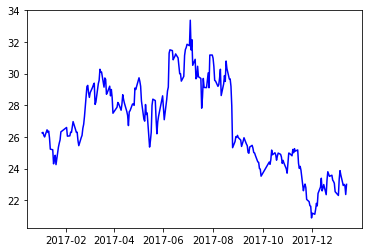

254


In [136]:
import matplotlib.pyplot as plt
import pandas as pd
import pymysql.cursors
import time
import pymysql
import numpy as np


import tushare as ts
import matplotlib.pyplot as plt
import pandas as pd
import pymysql.cursors
import time
import pymysql
import numpy as np



def getstockdata(stockid, starttime, endtime):
    df = ts.get_hist_data(stockid, start=starttime, end=endtime)
    df = df.astype(str)
    # add the stockinfo to the stockdata
    df['stockid'] = stockid
    df['tradedate'] = df.index

    # create a dataframe to save the stockdata;must have the same index with df
    df_stockinfo = df[['stockid', 'tradedate']]

    # delete the stockinfo from stockhist
    df.drop(labels=['stockid', 'tradedate'], axis=1, inplace=True)
    # merge the stockinfo with stockdata and save in the df_stock
    df_stock = df_stockinfo.merge(df, right_index=True, left_index=True)
    return df_stock


# define function to convert the dataframe to list contains tuple
def convertdata(dfstock):
    list_row = dfstock.shape[0]
    # create  the list to transport values to mysql
    values = []
    for i in range(list_row):
        # chose every row and convert its type (series)   to list
        value = pd.np.array(dfstock.iloc[i])
        # convert list to tuple and add to the end of values
        tuple_value = tuple(value)
        values.append(tuple_value)
    return values

#define function to save data to mysql
def getdata():
    # Connect to the database

    connection = pymysql.connect(host='localhost',user='root',password='123456',db='analysis',charset='utf8mb4',cursorclass=pymysql.cursors.DictCursor)

    try:
        #with connection.cursor() as cursor:
    # Create a new record
            #sql = "INSERT INTO stocks_data('stockid'，'tradedate'，'open'，'high'，'close','low','volume','price_change','p_change','ma5','ma10','ma20','v_ma5','v_ma10','v_ma20','turnover') VALUES( %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
          #  sql = "INSERT INTO stocks_data(stockid,tradedate,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover) VALUES( %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"

           # cursor.executemany(sql, values)

        # connection is not autocommit by default. So you must commit to save
        # your changes.
           # connection.commit()  # commit changes to stable storage

        with connection.cursor() as cursor:
    # Read a single record
            sql = "SELECT * FROM `stocks_data` "
            cursor.execute(sql)
            result = cursor.fetchall()
    #    print(result)
            return result

    except Exception as e:
        # throw the exception
        print("error:")
        print(e)
        connection.rollback()  # Roll back the current transaction


    finally:
        cursor.close()
        connection.close()


def main():
    begintime = time.time()
    results=getdata()
    df=pd.DataFrame(results)
    #print(values)
    endtime = time.time()
    print(type(results))
    print(begintime - endtime)
    print(type(df))
    #Edf2=df.iloc[:,0]
    x=df['tradedate']
    y=df['open']
    plt.plot(x,y,'-b')
    plt.show()
    print(df.shape[0])

main()


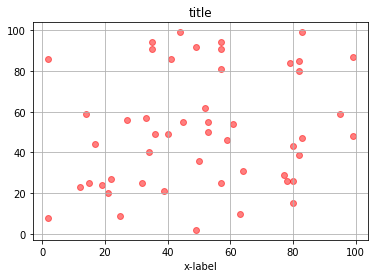

In [18]:
#使用封装函数画图
import matplotlib.pyplot as plt
import numpy as np

x=np.random.randint(1,100,50)
y=np.random.randint(2,100,50)
plt.scatter(x,y,color='r',alpha=0.5)
plt.xlabel("x-label")
plt.title("title")
plt.grid()
plt.show()

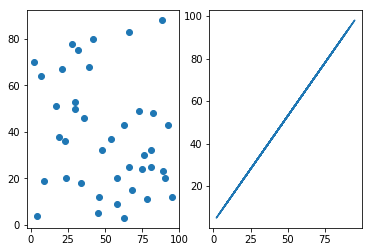

In [19]:
#使用面向对象画图
import matplotlib.pyplot as plt
import numpy as np

x=np.random.randint(1,100,40)
y=np.random.randint(2,90,40)
fig=plt.figure()
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.scatter(x,y)
ax2.plot(x,x+3)
plt.show()

In [20]:
 a=36*14
a

504

In [23]:
b=36*1.3

In [24]:
b

46.800000000000004

In [ ]:
c=